In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df=pd.read_csv("file2.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,location,total_sqft,bath,price,bhk,price_per
0,0,0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,1,1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,2,2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,3,3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,4,4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [3]:
df.drop(["Unnamed: 0.1","Unnamed: 0"],axis="columns",inplace=True)
df.head()

,location,total_sqft,bath,price,bhk,price_per
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [4]:
#outlier Detection
df[df.total_sqft/df.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [5]:
df.shape

(13257, 6)

In [6]:
df1=df[~(df.total_sqft/df.bhk<300)]
df1.shape

(12513, 6)

In [7]:
df1.price_per.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per, dtype: float64

In [8]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per)
        st = np.std(subdf.price_per)
        reduced_df = subdf[(subdf.price_per>(m-st)) & (subdf.price_per<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df1)
df7.shape

(10288, 6)

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

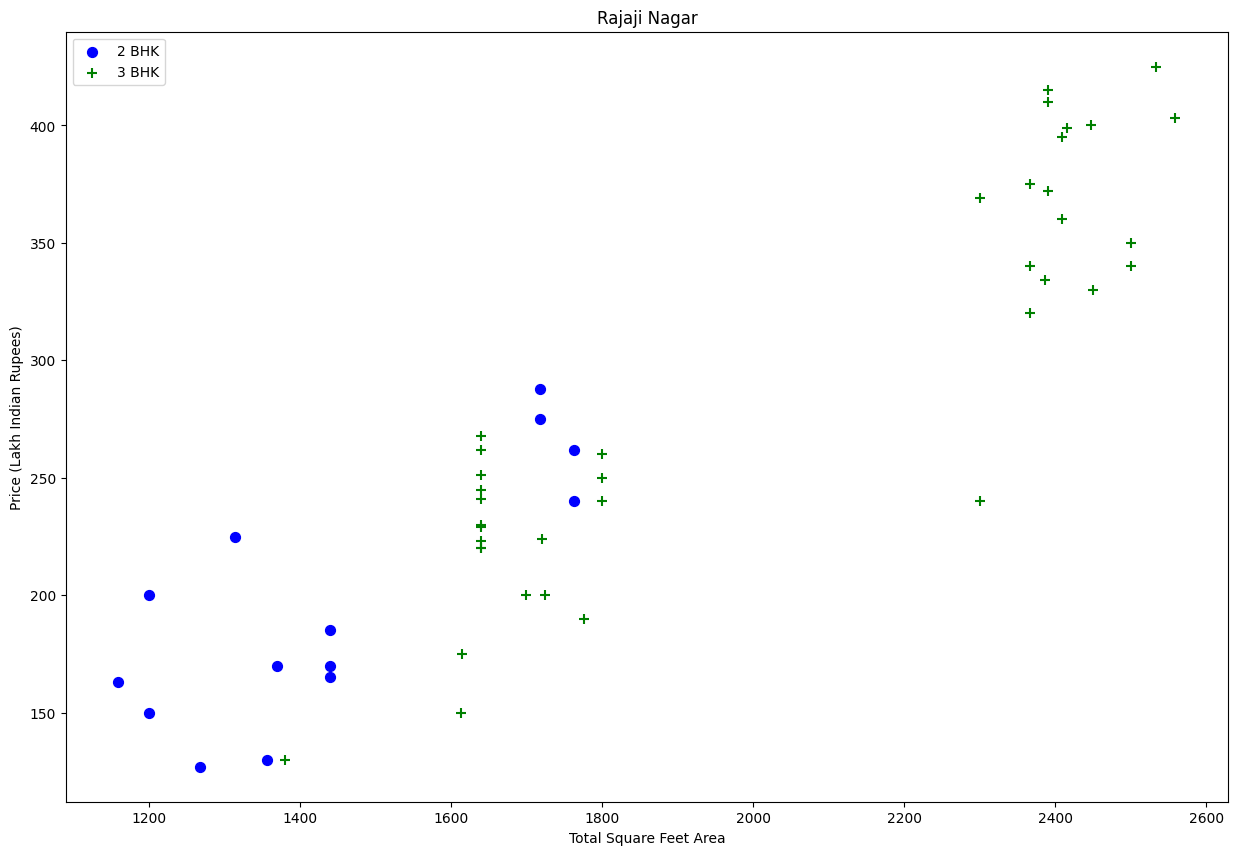

In [9]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

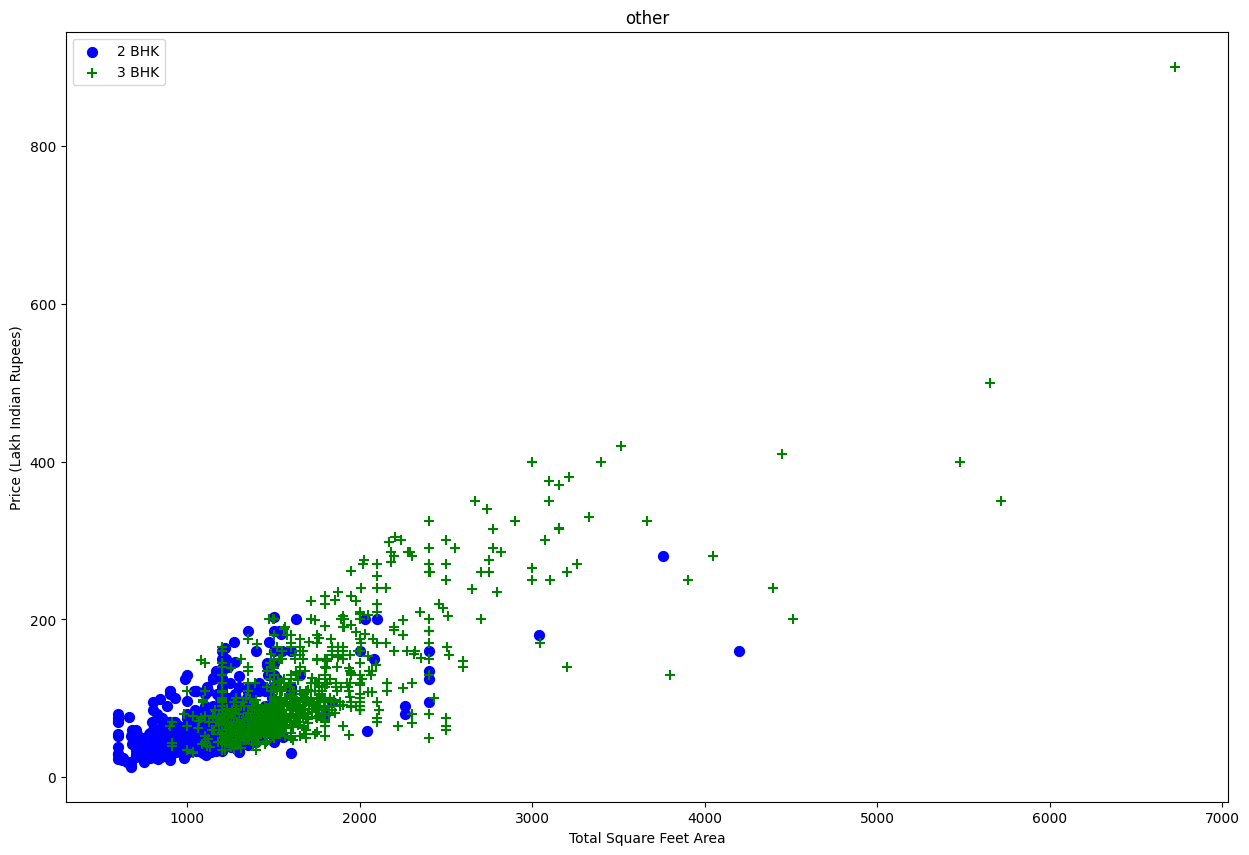

In [10]:
plot_scatter_chart(df7,"other")

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [11]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per),
                'std': np.std(bhk_df.price_per),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7342, 6)

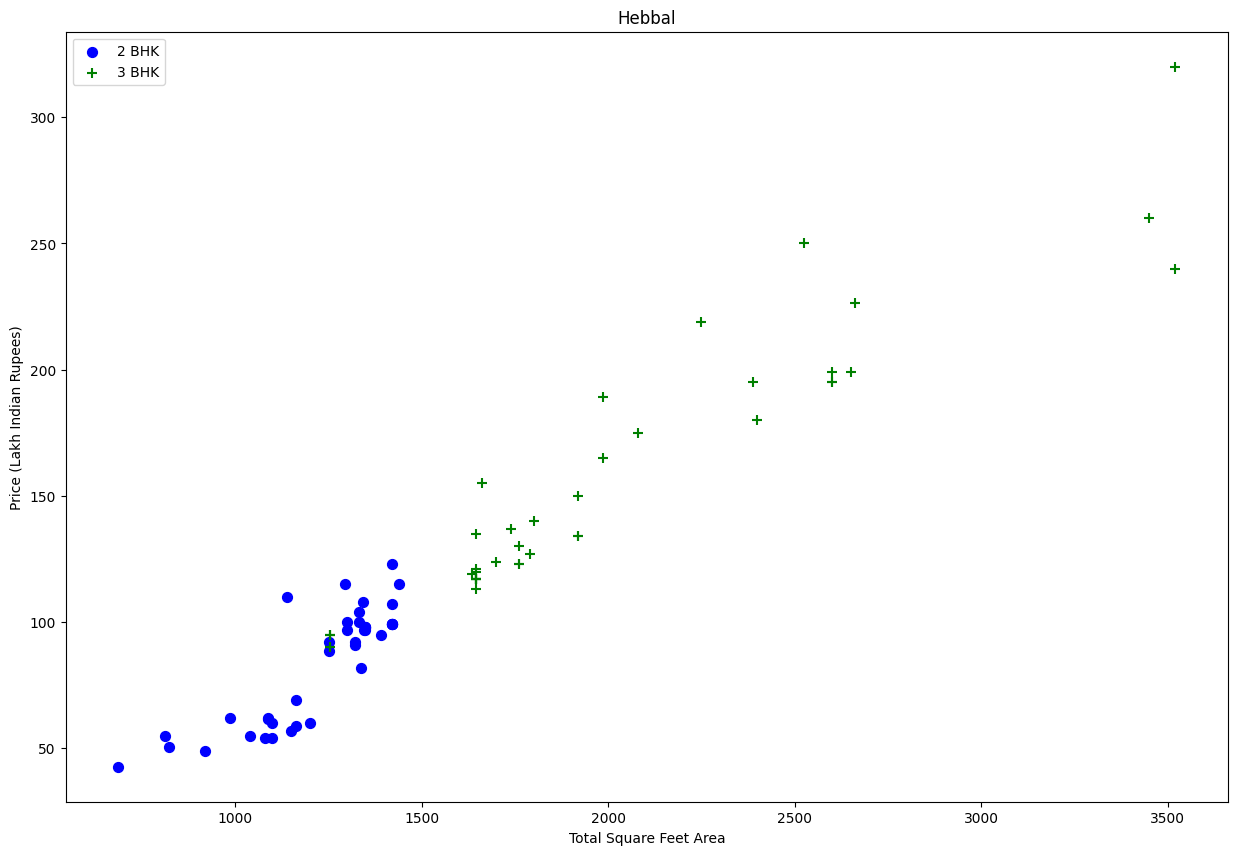

In [12]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

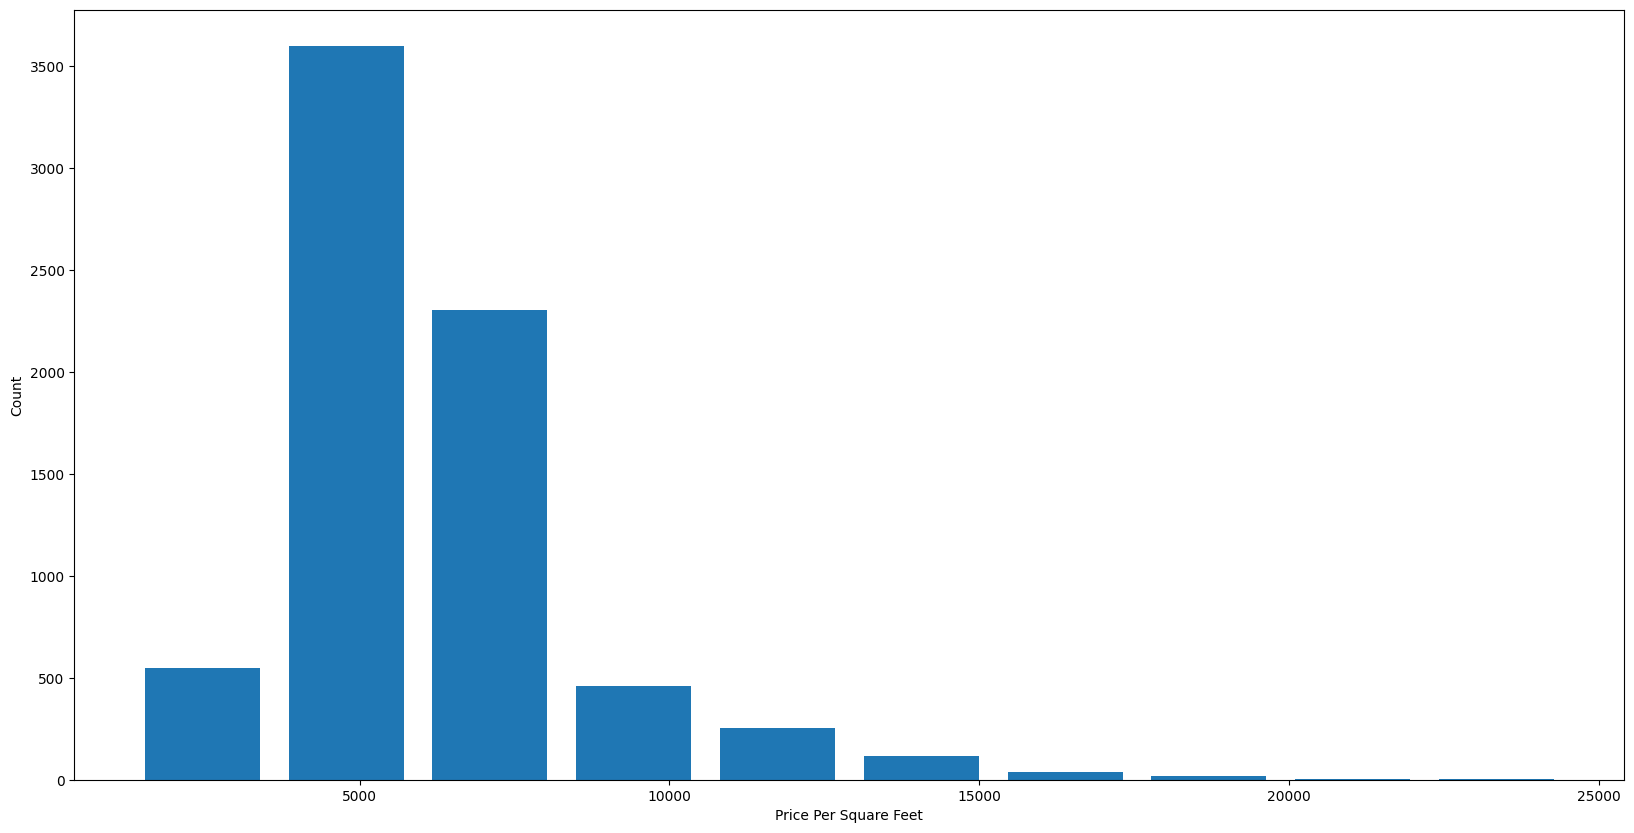

In [13]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

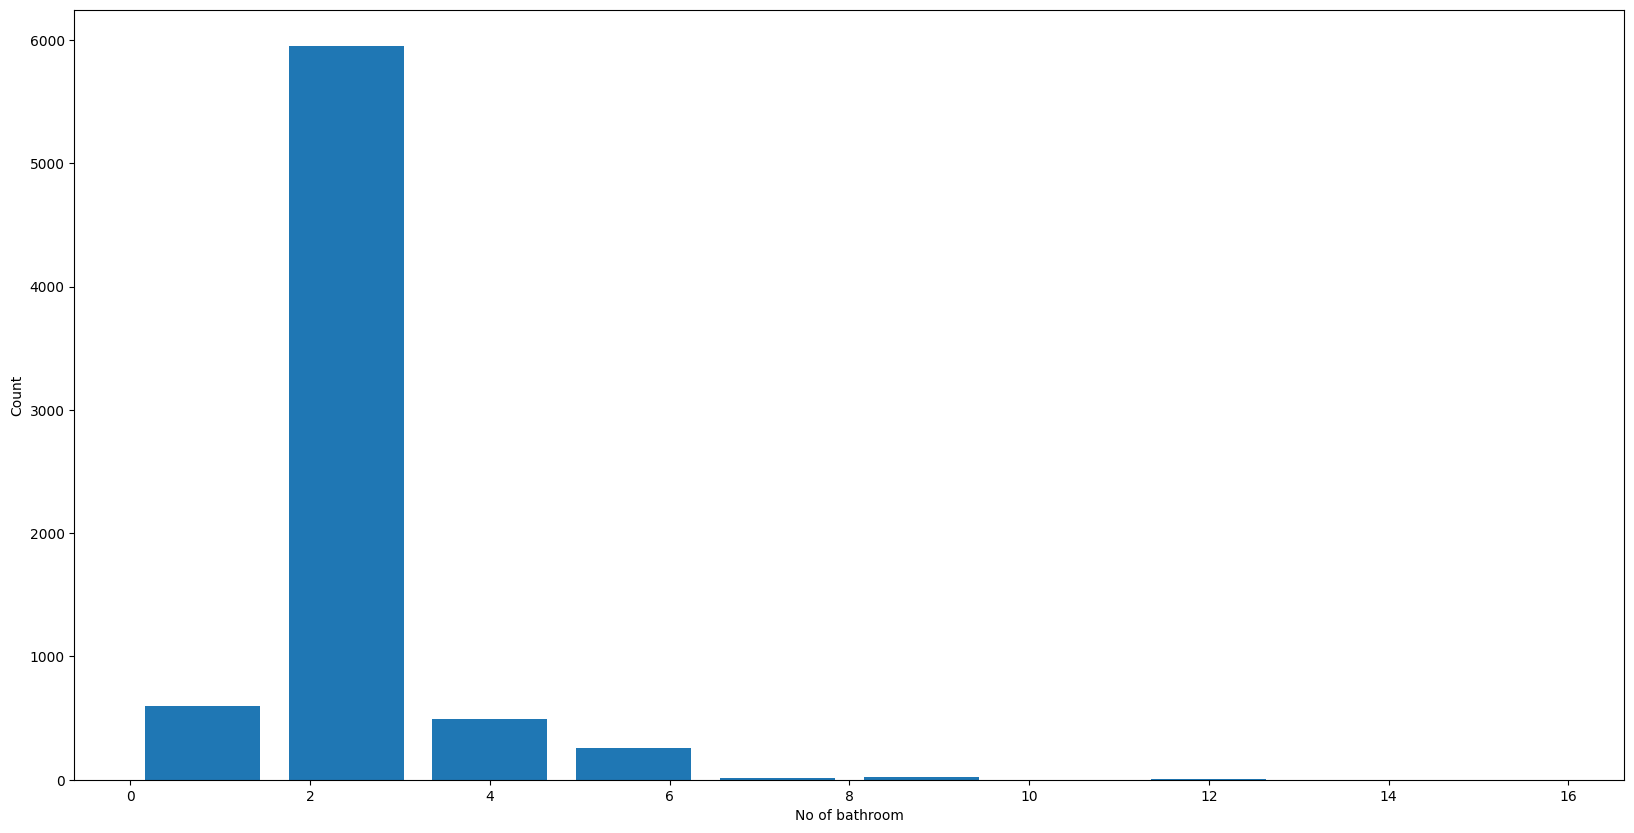

In [14]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("No of bathroom")
plt.ylabel("Count")

In [15]:
df9=df8[~(df8.bath>df8.bhk+2)]
df9.shape

(7338, 6)

In [16]:
df10=df9.drop("price_per",axis="columns")
df10

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10279,other,1200.0,2.0,70.0,2
10280,other,1800.0,1.0,200.0,1
10283,other,1353.0,2.0,110.0,2
10284,other,812.0,1.0,26.0,1


In [17]:
df10.to_csv("file3.csv")